In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    # plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    # plt.legend([string, 'val_'+string])
    plt.show()

In [3]:
df = pd.read_csv('Datasets/Raw_Dataset/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [4]:
features = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [5]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [6]:
df['Target']=df['Label'].apply(targetify)

In [7]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [8]:
y = df['Target']

In [9]:
X = X.fillna(0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 76) (838860,)
(209715, 76) (209715,)


In [50]:
# selecting 1% of random rows for better running time

X_train2 = X_train.sample(frac=0.01, replace=True, random_state=1)
y_train2 = y_train.sample(frac=0.01, replace=True, random_state=1)
X_test2 = X_test.sample(frac=0.01, replace=True, random_state=1)
y_test2 = y_test.sample(frac=0.01, replace=True, random_state=1)
print (X_train2.shape, y_train2.shape)
print( X_test2.shape, y_test2.shape)

(8389, 76) (8389,)
(2097, 76) (2097,)


In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train2.values)
X_train2 = pd.DataFrame(x_scaled,columns=features)
x_scaled_test = min_max_scaler.fit_transform(X_test2.values)
X_test2 = pd.DataFrame(x_scaled_test,columns=features)
# y_scaled = min_max_scaler.fit_transform(y_train2.values)
# y_train2 = pd.DataFrame(y_scaled,columns=features)
# y_scaled_test = min_max_scaler.fit_transform(y_test2.values)
# y_test2 = pd.DataFrame(y_scaled_test,columns=features)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10, 64), # since it doesn't consider "words," the embedding doesn't really matter
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # tf.keras.layers.Dense(1, activation='softmax') # loss too big
])

In [53]:
model.compile(loss='binary_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [54]:
history = model.fit(X_train2.values, y_train2.values, epochs=10)

Train on 8389 samples
Epoch 1/10
8389/8389 [==============================] - 13s 2ms/sample - loss: 0.6832 - accuracy: 0.5740
Epoch 2/10
8389/8389 [==============================] - 10s 1ms/sample - loss: 0.6661 - accuracy: 0.5771
Epoch 3/10
8389/8389 [==============================] - 10s 1ms/sample - loss: 0.5920 - accuracy: 0.5798
Epoch 4/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5862 - accuracy: 0.5805
Epoch 5/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5840 - accuracy: 0.5829
Epoch 6/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5805 - accuracy: 0.5879
Epoch 7/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5817 - accuracy: 0.5854
Epoch 8/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5801 - accuracy: 0.5885
Epoch 9/10
8389/8389 [==============================] - 11s 1ms/sample - loss: 0.5801 - accuracy: 0.5840
Epoch 10/10
8389/8389 [==========

In [55]:
test_loss, test_acc = model.evaluate(X_test2.values, y_test2.values, batch_size=64)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2097/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [56]:
predictions = model.predict(tf.expand_dims(X_test2.values, 0)[:,1])
print(predictions)

[[0.7316911]]


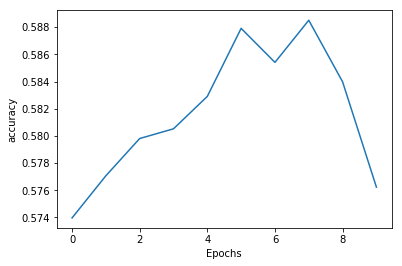

In [57]:
plot_graphs(history, 'accuracy')

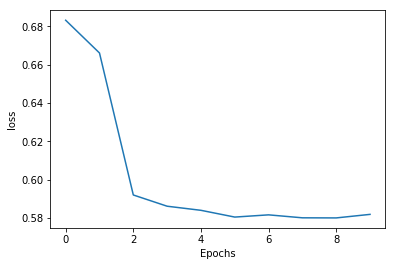

In [58]:
plot_graphs(history, 'loss')

In [59]:
# trying stacked LSTM layers

In [60]:
model_stack = tf.keras.Sequential([
    tf.keras.layers.Embedding(10, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model_stack.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [62]:
history_stack = model_stack.fit(X_train2.values, y_train2.values, epochs=10)

Train on 8389 samples
Epoch 1/10
8389/8389 [==============================] - 25s 3ms/sample - loss: 0.6828 - accuracy: 0.5746
Epoch 2/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.6629 - accuracy: 0.5767
Epoch 3/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.6001 - accuracy: 0.5783
Epoch 4/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.5937 - accuracy: 0.5794
Epoch 5/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.5931 - accuracy: 0.5766
Epoch 6/10
8389/8389 [==============================] - 21s 2ms/sample - loss: 0.5958 - accuracy: 0.5786
Epoch 7/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.5912 - accuracy: 0.5831
Epoch 8/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.5907 - accuracy: 0.5837
Epoch 9/10
8389/8389 [==============================] - 20s 2ms/sample - loss: 0.5904 - accuracy: 0.5836
Epoch 10/10
8389/8389 [==========

In [63]:
test_loss, test_acc = model_stack.evaluate(X_test2.values, y_test2.values, batch_size=64)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2097/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [64]:
predictions = model_stack.predict(tf.expand_dims(X_test2.values, 0)[:,1])
print(predictions)

[[0.54532695]]


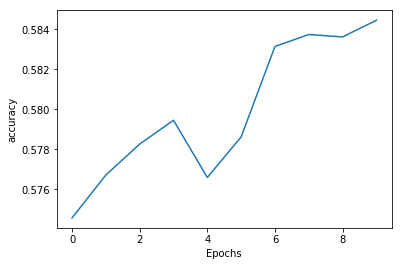

In [65]:
plot_graphs(history_stack, 'accuracy')

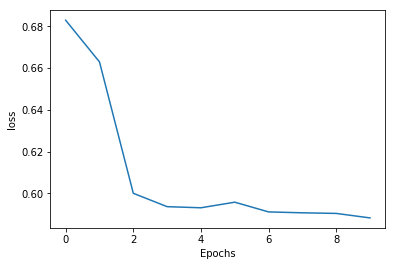

In [66]:
plot_graphs(history_stack, 'loss')